In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
data = pd.read_csv("data/file.csv", encoding='latin-1')

In [49]:
datas = data[data["Unit_x"] == "tonnes"]
datas = datas.drop("Domain", axis= 1)
datas = datas[datas["Item_x"] == "Vegetables Primary"]
datas = datas.drop("Unit_y", axis= 1)
datas = datas.drop("Item_x", axis=1)
datas = datas[datas["Item_y"] == "Pesticides (total)"]
datas = datas.drop("Item_y", axis=1)
datas = datas.drop("Element_y", axis=1)
datas = datas.drop("Element_x", axis=1)
datas = datas.drop("Unit_x", axis=1)

In [50]:
world = gpd.read_file("data/ne_110m_admin_0_countries.shx")
world = world.rename(index=str, columns={"SOVEREIGNT": "Area"})
#world = world[world["TYPE"] == "Country"]
merged = pd.merge(datas, world, on= ["Area"], how= "left")

In [14]:
merged = gpd.GeoDataFrame(merged)
type(merged)

geopandas.geodataframe.GeoDataFrame

<Axes: >

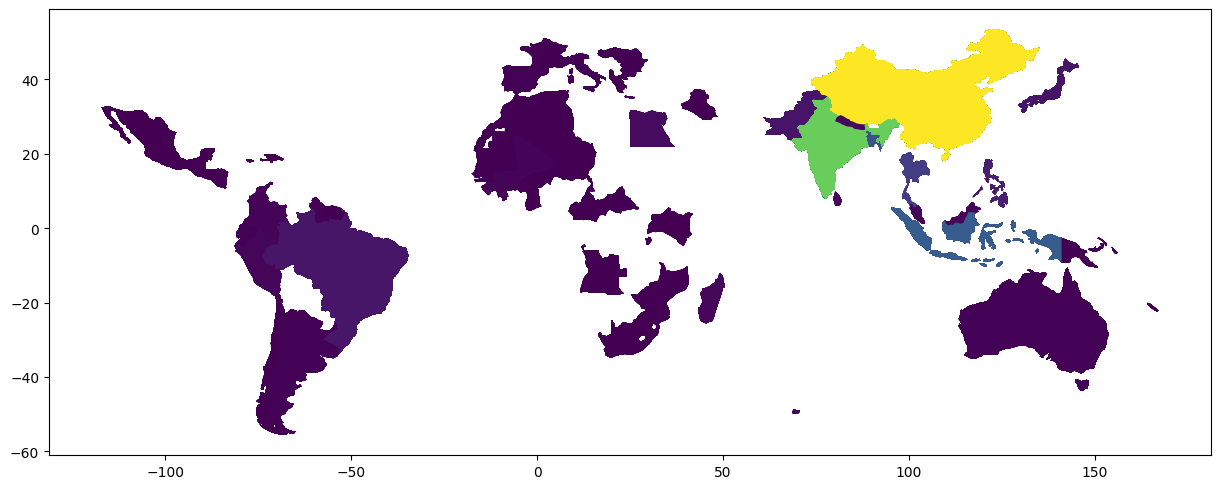

In [15]:
merged = gpd.GeoDataFrame(merged)
merged.plot("yield_amound", figsize=(15,10))

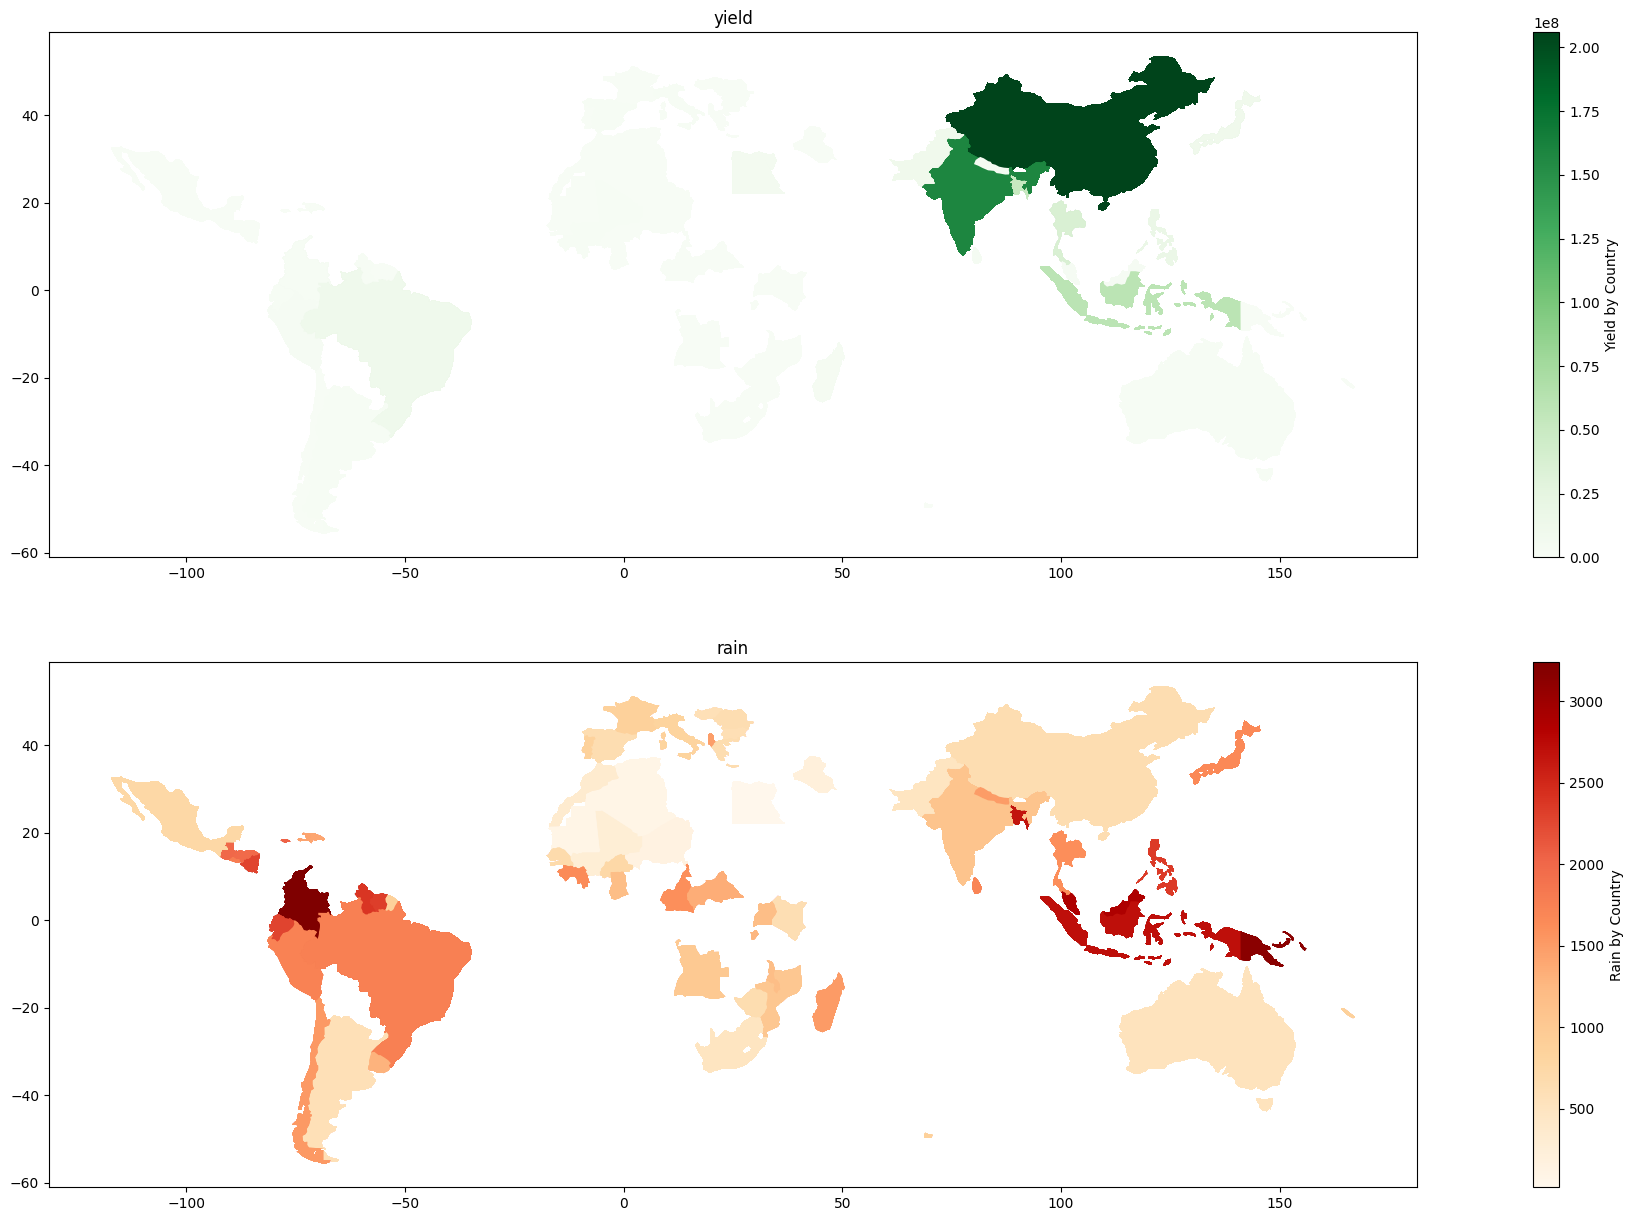

In [16]:
plt.figure(figsize=(30,15))
ax1 = plt.subplot(211)

merged.plot("yield_amound",
                           legend=True,
                           legend_kwds={"label":"Yield by Country"},
                           cmap=plt.cm.Greens,
                           ax=ax1,
                           missing_kwds={
                               "color": "grey",
                               "hatch":"."
                           }
                          )
plt.title("yield");

ax2 = plt.subplot(212)
merged.plot("rain",
                           legend=True,
                           legend_kwds={"label":"Rain by Country"},
                           cmap=plt.cm.OrRd,
                           ax=ax2,
                           missing_kwds={
                               "color": "grey",
                               "hatch":"."
                           }
                          )
plt.title("rain");


In [33]:
#Generate a world-wide choropleth map using plotly’s choropleth function:
import plotly.express as px

fig = px.choropleth(merged,
                    locations="SOV_A3", # colunm containing ISO 3166 country codes
                    color="yield_amound", # column by which to color-code
                    hover_name="Area", # column to display in hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [60]:
#Sort the dataset by Year 
merged.sort_values(by=["Year"],inplace=True)

fig = px.choropleth(merged, locations="SOV_A3",
                    color="rain", # lifeExp is a column of gapminder
                    hover_name="Area", # column to add to hover information
                    animation_frame="Year", # column on which to animate
                    color_continuous_scale=px.colors.sequential.Plasma,
                    )
                    
fig.update_layout(
    # add a title text for the plot
    title_text = '',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) # by default, projection type is set to 'equirectangular'
)
fig.update_geos(
    resolution=110,
    showcountries=True, countrycolor="RebeccaPurple"
)
#fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()